In [13]:
from pyclustering.cluster.kmedoids import kmedoids
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.datasets import make_blobs
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## Simple example of clusters

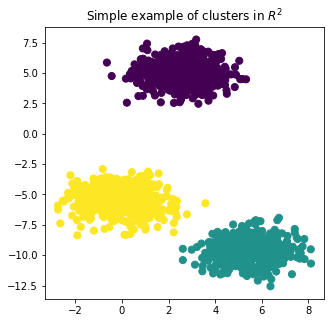

In [15]:
x, y = make_blobs(n_samples=1500, random_state=10)

km = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0) 
y_pred = km.fit_predict(x)

plt.figure(figsize=(5, 5))
plt.scatter(x[:, 0], x[:, 1], c = y_pred, s=50)
plt.grid
plt.title('Simple example of clusters in $R^2$')
plt.show()

In [51]:
km.cluster_centers_

array([[ 2.63566673,  4.98406936],
       [ 5.43596485, -9.61635873],
       [-0.04955806, -5.52563309]])

## K-Medoids

### Algorithm:

* Select first medoid $m_1$, which minimize the distance to rest of samples.
* For each $x_i$ (not yet selected as medoid), for each $x_j$ not equal to $x_i$ calculate the contribution of $x_j$ to selection of $x_i$.
$$c_{ij} = max(D_j - d(x_i, x_j), 0), $$
where $D_j$ - distance to the closest previous medoid. 
* Calculate $c_i = \sum\limits_{j}c_{ij}$.
* Select as a next medoid one with the largest $c_i$.
* Repeat previous steps untill $k$ medoids will be selected. 

In [57]:
initial_medoids = [720, 267, 1333]

In [58]:
kmedoids_instance = kmedoids(x, initial_medoids)
kmedoids_instance.process();
clusters = kmedoids_instance.get_clusters()
medoids = kmedoids_instance.get_medoids()

In [60]:
y = np.zeros(len(x))

for i, cluster in enumerate(clusters[1:]):
    y[cluster] = i + 1

In [88]:
medoids_data = []
for medoid in medoids:
    medoids_data.append(list(x[medoid]))
    
medoids_data = np.array(medoids_data)

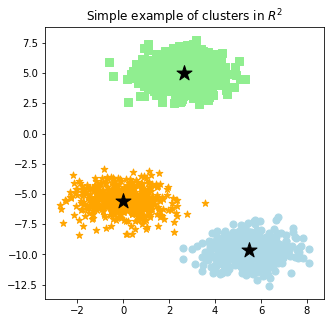

In [90]:
plt.figure(figsize=(5, 5))
plt.scatter(x[y == 0][:, 0], x[y == 0][:, 1], s=50, c='lightgreen', marker='s', label = 'cluster 1')
plt.scatter(x[y == 1][:, 0], x[y == 1][:, 1], s=50, c='lightblue', marker='o', label = 'cluster 2')
plt.scatter(x[y == 2][:, 0], x[y == 2][:, 1], s=50, c='orange', marker='*', label = 'cluster 3')
plt.scatter(medoids_data[:,0], medoids_data[:,1], s=250, marker='*', c='black', label = 'centroids')
plt.grid
plt.title('Simple example of clusters in $R^2$')
plt.show()